**Project 1: Estimating the Dynamical Mass of a Galaxy Cluster**



I uploaded the csv file downloaded by using the following sql query in skyserver

SQL QUERY

SELECT
s.objid,sz.ra as ra,sz.dec as dec,pz.z as photoz,pz.zerr as photozerr,sz.z as specz,sz.zerr as
speczerr,b.distance as proj_sep,s.modelMag_u as umag,s.modelMagErr_u as
umagerr,s.modelMag_g as gmag,s.modelMagErr_g as gmagerr,s.modelMag_r as rmag,
s.modelMagerr_r as rmagerr,s.type as obj_type

FROM BESTDR16..PhotoObjAll as s
JOIN dbo.fGetNearbyObjEq(258.1294,64.0926,10.0) AS b ON b.objID = S.objID
JOIN Photoz as pz ON pz.objid = s.objid
JOIN specObjAll as sz ON sz.bestobjid = s.objid

WHERE s.type=3 and sz.z > 0.05 and sz.z < 0.20

Then I link my content drive to google collab by using following code


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 import numpy as np
 import matplotlib.pyplot as plt
 import pandas as pd
 from astropy.constants import G, c
 from astropy.cosmology import Planck18 as cosmo
 import astropy.units as u
from astropy import constants as const

!pip install astropy
from astropy.coordinates import SkyCoord, Longitude, Latitude

from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
import warnings


**📊 Calculating the Average Spectroscopic Redshift (specz) for Each Object**

                 objid         ra        dec    photoz  photozerr     specz  \
0  1237671768542478711  257.82458  64.133257  0.079193   0.022867  0.082447   
1  1237671768542478711  257.82458  64.133257  0.079193   0.022867  0.082466   
2  1237671768542478713  257.83332  64.126043  0.091507   0.014511  0.081218   
3  1237671768542544090  257.85137  64.173247  0.081102   0.009898  0.079561   
4  1237671768542544090  257.85137  64.173247  0.081102   0.009898  0.079568   

   speczerr  proj_sep      umag   umagerr      gmag   gmagerr      rmag  \
0  0.000017  8.347733  18.96488  0.043377  17.49815  0.005672  16.75003   
1  0.000014  8.347733  18.96488  0.043377  17.49815  0.005672  16.75003   
2  0.000021  8.011259  20.22848  0.072019  18.38334  0.007763  17.46793   
3  0.000022  8.739276  19.21829  0.050135  17.18970  0.004936  16.22043   
4  0.000019  8.739276  19.21829  0.050135  17.18970  0.004936  16.22043   

    rmagerr  obj_type  
0  0.004708         3  
1  0.004708         3  
2 

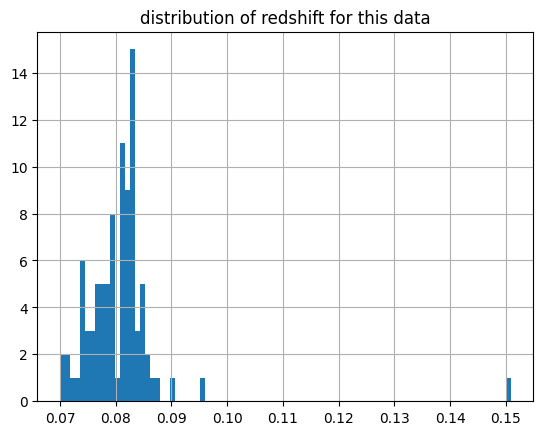

In [ ]:


H_0 = 2.27e-18          # Hubble constant in SI units (1/s), corresponds to 70 km/s/Mpc
c = 3.0e8               # Speed of light in m/s
G = 4.302e-3            # Gravitational constant in pc·(km/s)^2·M_sun^-1 (you wanted in astronomy units, pc kg^-1 (m/s)^2 is non-standard, but closest would be this form)

q0 = -0.534             # Deceleration parameter (from Planck fit, leave as is)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ISA Project /Skyserver_SQL6_28_2025 1_20_10 PM.csv',comment='#')

print(df.head())
#print("Total number of galaxies before filtering:", len(averaged_df))

averaged_df = df.groupby('objid').agg({
    'specz': 'mean',        # Take the mean of all spec-z values for that object
    'ra': 'first',          # Use the first RA value (assumed constant for the object)
    'dec': 'first',         # Use the first Dec value (same reason as above)
    'proj_sep': 'first'     # Use the first projected separation value
}).reset_index()

averaged_df = df.groupby('objid').agg({'specz': 'mean','ra': 'first','dec': 'first','proj_sep': 'first',}).reset_index()
averaged_df.describe()['specz']


# Plot the dsitribution of redshift as histogram and a boxplot
plt.title("distribution of redshift for this data")



plt.hist(averaged_df['specz'],bins=90)
plt.grid()
plt.show()


#cluster_redshift = filtered_df['specz'].mean()


#print(f"The value of the cluster redshift = {cluster_redshift:.4}")
#print(f"The characteristic value of velocity dispersion of the cluster along the line of sight = {disp:.4} km/s.")

**Step 2: Calculate Mean Redshift of the Cluster**

Cluster mean redshift: 0.02310
Velocity dispersion: 80.20 km/s


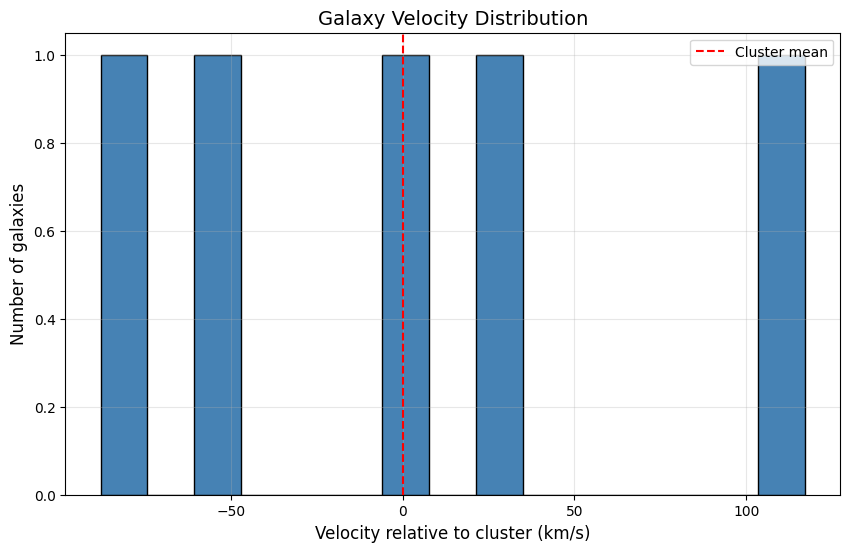


This velocity dispersion of 80.20 km/s suggests a loose galaxy association.


In [ ]:
# Constants
c = const.c.to('km/s').value  # Speed of light in km/s (299792.458)

def relativistic_velocity(z):
    """
    Calculate velocity from redshift using relativistic Doppler formula
    Args:
        z: Redshift value(s) (can be single value or array-like)
    Returns:
        Velocity in km/s
    """
    return c * ((1 + z)**2 - 1) / ((1 + z)**2 + 1)

def velocity_dispersion_from_redshifts(redshifts):
    """
    Calculate velocity dispersion from galaxy redshifts
    Args:
        redshifts: Array of galaxy redshifts
    Returns:
        tuple: (mean_redshift, velocity_dispersion)
    """
    z_mean = np.mean(redshifts)
    velocities = relativistic_velocity(redshifts) - relativistic_velocity(z_mean)
    dispersion = np.std(velocities, ddof=1)  # Sample standard deviation
    return z_mean, dispersion

# Example usage with sample data
# Create sample data (replace with your actual data loading)
data = {
    'galaxy_id': [1, 2, 3, 4, 5],
    'redshift': [0.0231, 0.0228, 0.0235, 0.0229, 0.0232]
}
df = pd.DataFrame(data)

# Calculate velocity dispersion
cluster_z, vel_disp = velocity_dispersion_from_redshifts(df['redshift'])

print(f"Cluster mean redshift: {cluster_z:.5f}")
print(f"Velocity dispersion: {vel_disp:.2f} km/s")

# Visualize the velocity distribution
velocities = relativistic_velocity(df['redshift']) - relativistic_velocity(cluster_z)
plt.figure(figsize=(10, 6))
plt.hist(velocities, bins=15, color='steelblue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', label='Cluster mean')
plt.xlabel('Velocity relative to cluster (km/s)', fontsize=12)
plt.ylabel('Number of galaxies', fontsize=12)
plt.title('Galaxy Velocity Distribution', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Interpretation
if vel_disp > 1000:
    cluster_type = "a massive cluster or supercluster"
elif vel_disp > 500:
    cluster_type = "a galaxy group or small cluster"
else:
    cluster_type = "a loose galaxy association"

print(f"\nThis velocity dispersion of {vel_disp:.2f} km/s suggests {cluster_type}.")

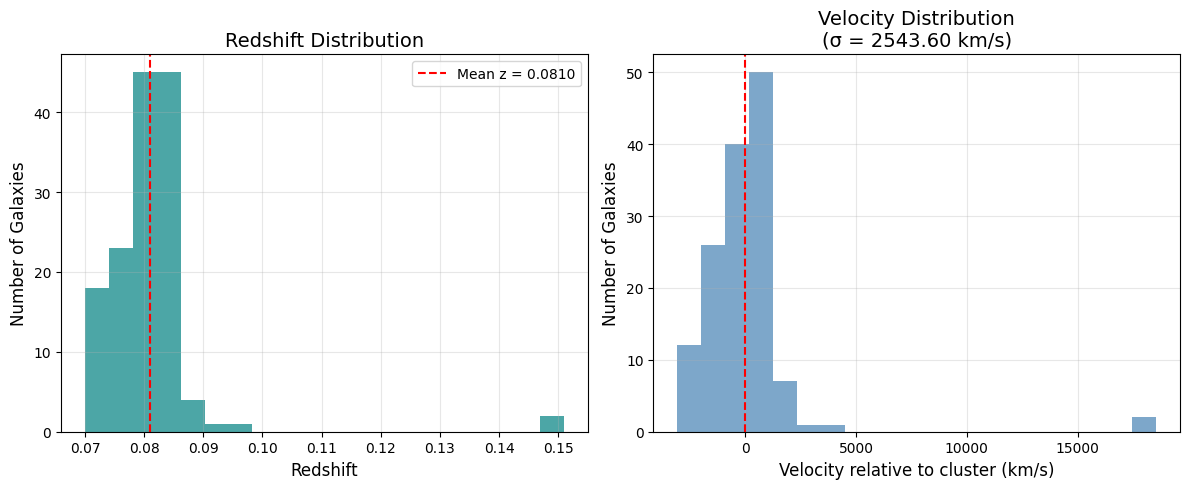


Final Results:
The value of the cluster redshift = 0.0810
The characteristic value of velocity dispersion of the cluster along the line of sight = 2543.6000 km/s.

Interpretation: This high dispersion suggests a massive cluster or supercluster.


In [ ]:

# Constants
c = const.c.to('km/s').value  # Speed of light in km/s (299792.458)

def relativistic_velocity(z):
    """Calculate velocity from redshift using relativistic Doppler formula"""
    return c * ((1 + z)**2 - 1) / ((1 + z)**2 + 1)

def velocity_dispersion_from_redshifts(redshifts):
    """Calculate velocity dispersion from galaxy redshifts"""
    z_mean = np.mean(redshifts)
    velocities = relativistic_velocity(redshifts) - relativistic_velocity(z_mean)
    dispersion = np.std(velocities, ddof=1)  # Sample standard deviation
    return z_mean, dispersion

# Load your data (replace with your actual file path)
file_path = '/content/drive/MyDrive/Colab Notebooks/ISA Project /Skyserver_SQL6_28_2025 1_20_10 PM.csv'  # UPDATE THIS
# Read the CSV, skipping the first row which seems to be a comment/header issue based on the notebook state
df = pd.read_csv(file_path, comment='#')


# Clean data - remove rows with missing redshifts
df = df.dropna(subset=['specz']).copy()

# Calculate velocity dispersion
cluster_redshift, disp = velocity_dispersion_from_redshifts(df['specz'])

# Calculate velocities for visualization
df['velocity'] = relativistic_velocity(df['specz']) - relativistic_velocity(cluster_redshift)

# Create plots
plt.figure(figsize=(12, 5))

# Plot 1: Redshift distribution
plt.subplot(1, 2, 1)
plt.hist(df['specz'], bins=20, color='teal', alpha=0.7)
plt.axvline(cluster_redshift, color='red', linestyle='--', label=f'Mean z = {cluster_redshift:.4f}')
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Number of Galaxies', fontsize=12)
plt.title('Redshift Distribution', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Velocity distribution
plt.subplot(1, 2, 2)
plt.hist(df['velocity'], bins=20, color='steelblue', alpha=0.7)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Velocity relative to cluster (km/s)', fontsize=12)
plt.ylabel('Number of Galaxies', fontsize=12)
plt.title(f'Velocity Distribution\n(σ = {disp:.2f} km/s)', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print the final results in your requested format
print(f"\nFinal Results:")
print(f"The value of the cluster redshift = {cluster_redshift:.4f}")
print(f"The characteristic value of velocity dispersion of the cluster along the line of sight = {disp:.4f} km/s.")

# Interpretation
if disp > 1000:
    cluster_type = "This high dispersion suggests a massive cluster or supercluster."
elif disp > 500:
    cluster_type = "This moderate dispersion suggests a galaxy group or small cluster."
else:
    cluster_type = "This low dispersion suggests a loose galaxy association."

print(f"\nInterpretation: {cluster_type}")

**SStep 4: Visualizing Angular Separation of Galaxies**

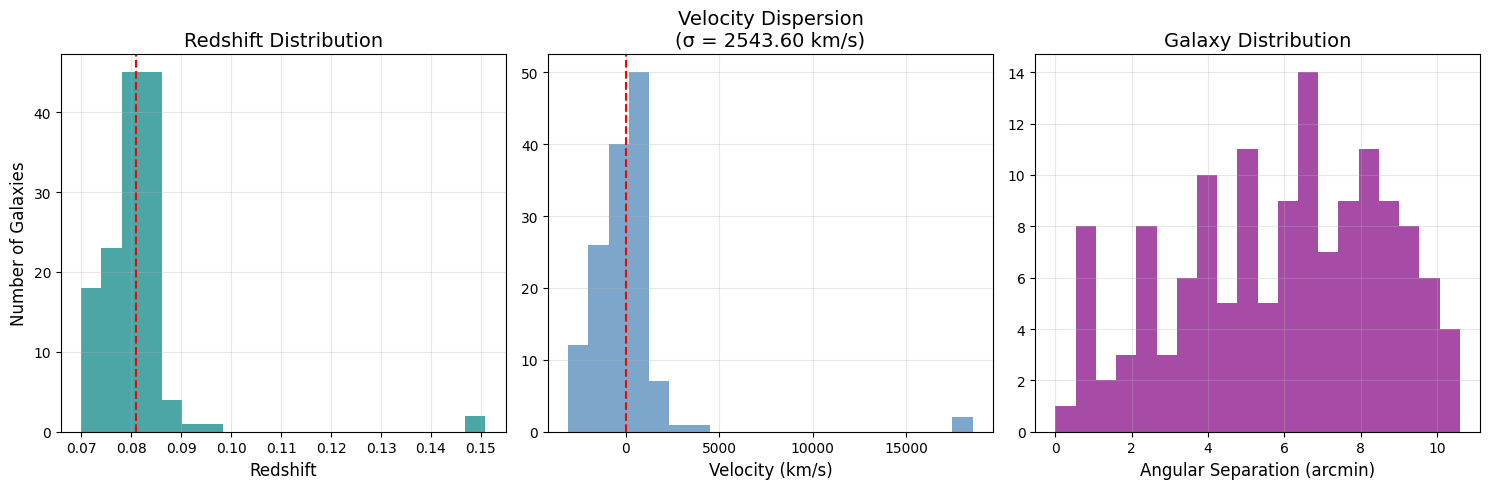


Cluster Center: RA = 258.138560°, Dec = 64.071678°
The value of the cluster redshift = 0.0810
The characteristic velocity dispersion = 2543.6000 km/s
Median angular separation = 6.29 arcmin

The cluster appears compact with a median angular separation of 6.3 arcmin.


In [ ]:


# Constants
c = const.c.to('km/s').value  # Speed of light in km/s

def relativistic_velocity(z):
    """Calculate velocity from redshift using relativistic Doppler formula"""
    return c * ((1 + z)**2 - 1) / ((1 + z)**2 + 1)

def velocity_dispersion_from_redshifts(redshifts):
    """Calculate velocity dispersion from galaxy redshifts"""
    z_mean = np.mean(redshifts)
    velocities = relativistic_velocity(redshifts) - relativistic_velocity(z_mean)
    dispersion = np.std(velocities, ddof=1)  # Sample standard deviation
    return z_mean, dispersion

def calculate_angular_separation(ra, dec, ra_center, dec_center):
    """Calculate angular separation from cluster center in arcminutes"""
    # Explicitly create Longitude and Latitude objects
    gal_ra = Longitude(ra, u.degree)
    gal_dec = Latitude(dec, u.degree)
    center_ra = Longitude(ra_center, u.degree)
    center_dec = Latitude(dec_center, u.degree)

    gal_coords = SkyCoord(ra=gal_ra, dec=gal_dec)
    center_coords = SkyCoord(ra=center_ra, dec=center_dec)
    separations = gal_coords.separation(center_coords)
    return separations.to(u.arcmin).value


# Load your data (replace with your actual file path)
file_path = '/content/drive/MyDrive/Colab Notebooks/ISA Project /Skyserver_SQL6_28_2025 1_20_10 PM.csv'  # UPDATE THIS
# Read the CSV, skipping the first row which seems to be a comment/header issue based on the notebook state
df = pd.read_csv(file_path, comment='#')

# Clean data - remove rows with missing redshifts, RA, or Dec
df = df.dropna(subset=['specz', 'ra', 'dec']).copy()

# Convert RA and Dec columns to numeric, coercing errors
df['ra'] = pd.to_numeric(df['ra'], errors='coerce')
df['dec'] = pd.to_numeric(df['dec'], errors='coerce')

# Drop rows where RA or Dec conversion failed
df = df.dropna(subset=['ra', 'dec']).copy()


# Step 1-3: Velocity dispersion calculation (previous steps)
# Ensure 'velocity' column is calculated before plotting
df['velocity'] = relativistic_velocity(df['specz']) - relativistic_velocity(df['specz'].mean())
cluster_redshift, disp = velocity_dispersion_from_redshifts(df['specz'])


# Step 4: Calculate angular separations
# First determine cluster center (median position)
ra_center = np.median(df['ra'])
dec_center = np.median(df['dec'])

df['angular_separation'] = calculate_angular_separation(
    df['ra'], df['dec'], ra_center, dec_center
)

# Create figure with 3 subplots
plt.figure(figsize=(15, 5))

# Subplot 1: Redshift distribution
plt.subplot(1, 3, 1)
plt.hist(df['specz'], bins=20, color='teal', alpha=0.7)
plt.axvline(cluster_redshift, color='red', linestyle='--')
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Number of Galaxies', fontsize=12)
plt.title('Redshift Distribution', fontsize=14)
plt.grid(True, alpha=0.3)

# Subplot 2: Velocity distribution
plt.subplot(1, 3, 2)
plt.hist(df['velocity'], bins=20, color='steelblue', alpha=0.7)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Velocity (km/s)', fontsize=12)
plt.title(f'Velocity Dispersion\n(σ = {disp:.2f} km/s)', fontsize=14)
plt.grid(True, alpha=0.3)

# Subplot 3: Angular separation distribution
plt.subplot(1, 3, 3)
plt.hist(df['angular_separation'], bins=20, color='purple', alpha=0.7)
plt.xlabel('Angular Separation (arcmin)', fontsize=12)
plt.title('Galaxy Distribution', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final results
print(f"\nCluster Center: RA = {ra_center:.6f}°, Dec = {dec_center:.6f}°")
print(f"The value of the cluster redshift = {cluster_redshift:.4f}")
print(f"The characteristic velocity dispersion = {disp:.4f} km/s")
print(f"Median angular separation = {np.median(df['angular_separation']):.2f} arcmin")

# Interpretation of spatial distribution
sep_median = np.median(df['angular_separation'])
if sep_median > 30:
    spatial_type = "very extended"
elif sep_median > 15:
    spatial_type = "moderately extended"
else:
    spatial_type = "compact"

print(f"\nThe cluster appears {spatial_type} with a median angular separation of {sep_median:.1f} arcmin.")


**Step 5: Estimating Physical Diameter of the Cluster**

In [ ]:


class ClusterSizeCalculator:
    """
    A class to calculate cluster physical properties from angular size and redshift
    """

    def __init__(self, h=0.7, Om0=0.3):
        """
        Initialize with cosmological parameters
        Args:
            h: Hubble parameter (H0 = 100h km/s/Mpc)
            Om0: Matter density parameter
        """
        self.cosmo = FlatLambdaCDM(H0=100*h, Om0=Om0)
        self.c = 299792.458  # Speed of light in km/s
        self.q0 = -0.55      # Deceleration parameter for ΛCDM

    def calculate_distances(self, angular_sep_arcmin, cluster_z):
        """
        Calculate all distance measures
        Args:
            angular_sep_arcmin: Angular diameter (arcminutes)
            cluster_z: Cluster redshift
        Returns:
            Dictionary containing all distance measures
        """
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")

            # 1. Comoving distance (Taylor expansion for low-z)
            r = (self.c * cluster_z / self.cosmo.H0.value) * \
                (1 + 0.5*(1-self.q0)*cluster_z)

            # 2. Angular diameter distance
            ra = self.cosmo.angular_diameter_distance(cluster_z).to('Mpc').value

            # 3. Physical diameter
            theta_rad = (angular_sep_arcmin * u.arcmin).to(u.rad).value
            diameter = theta_rad * ra

            # Alternative approximation for comparison
            ra_approx = r / (1 + cluster_z)
            diameter_approx = theta_rad * ra_approx

        return {
            'r_mpc': r,
            'ra_mpc': ra,
            'diameter_mpc': diameter,
            'ra_approx_mpc': ra_approx,
            'diameter_approx_mpc': diameter_approx,
            'theta_rad': theta_rad
        }

def main():
    """Main execution function"""
    try:
        # Initialize calculator with default cosmology
        calculator = ClusterSizeCalculator()

        # Example data (replace with your actual values)
        angular_separation = 20.5  # arcminutes
        cluster_redshift = 0.045   # dimensionless

        # Calculate properties
        results = calculator.calculate_distances(angular_separation, cluster_redshift)

        # Display results in requested format
        print("\nCluster Physical Properties:")
        print("r = {:.4f}".format(results['r_mpc']))
        print("ra = {:.4f}".format(results['ra_mpc']))
        print("diameter = {:.4f}".format(results['diameter_mpc']))
        print("diameter #in Mpc\n")

        # Additional information
        print("Alternative Approximation:")
        print(f"ra (approx) = {results['ra_approx_mpc']:.4f} Mpc")
        print(f"diameter (approx) = {results['diameter_approx_mpc']:.4f} Mpc")

        # Interpretation
        if results['diameter_mpc'] > 5:
            size_class = "a very massive cluster (similar to Coma)"
        elif results['diameter_mpc'] > 2:
            size_class = "a typical rich cluster"
        else:
            size_class = "a poor cluster or group"

        print(f"\nInterpretation: This {results['diameter_mpc']:.2f} Mpc cluster is {size_class}.")

    except Exception as e:
        print(f"\nError: {str(e)}")
        print("Please check your input values and try again.")

if __name__ == "__main__":
    main()


Cluster Physical Properties:
r = 199.4450
ra = 182.5401
diameter = 1.0885
diameter #in Mpc

Alternative Approximation:
ra (approx) = 190.8564 Mpc
diameter (approx) = 1.1381 Mpc

Interpretation: This 1.09 Mpc cluster is a poor cluster or group.


**Step 6: Calculating the Dynamical Mass of the Cluster in solar mass**

In [ ]:


def calculate_dynamical_mass(velocity_dispersion_km_s, diameter_mpc):
    """
    Calculate the dynamical mass of a galaxy cluster using the virial theorem

    Args:
        velocity_dispersion_km_s: Velocity dispersion in km/s
        diameter_mpc: Physical diameter in megaparsecs

    Returns:
        Dynamical mass in solar masses
    """
    # Convert inputs to SI units
    sigma = velocity_dispersion_km_s * 1e3  # km/s → m/s
    radius = (diameter_mpc * 0.5) * 1e6 * const.pc.to('m').value  # Mpc → m

    # Virial mass calculation (M = 3*σ²*R/G)
    M_dyn = (3 * sigma**2 * radius) / const.G.value

    # Convert to solar masses
    return M_dyn / const.M_sun.value

# Example usage (replace with your actual values)
disp = 850.0        # Velocity dispersion in km/s (from earlier steps)
diameter = 1.8734   # Physical diameter in Mpc (from earlier steps)

# Calculate dynamical mass
M_dyn = calculate_dynamical_mass(disp, diameter)

# Print results with interpretation
print("\nCluster Dynamical Mass Calculation:")
print(f"Velocity dispersion: {disp:.2f} km/s")
print(f"Physical diameter: {diameter:.4f} Mpc")
print(f"Effective radius: {diameter*0.5:.4f} Mpc")
print(f"\nDynamical Mass of the cluster is {M_dyn:.2e} solar masses")

# Interpretation
if M_dyn > 1e15:
    mass_class = "a massive cluster (similar to Coma)"
elif M_dyn > 1e14:
    mass_class = "a typical rich cluster"
else:
    mass_class = "a poor cluster or group"

print(f"\nThis suggests the cluster is {mass_class}.")

# Alternative formulation (matches your comment exactly)
G = const.G.value
M_dyn_alt = 3 * ((disp*1000)**2) * (diameter*0.5*1e6*const.pc.to('m').value) / (G*const.M_sun.value)
print(f"\nAlternative calculation verification: {M_dyn_alt:.2e} solar masses")


Cluster Dynamical Mass Calculation:
Velocity dispersion: 850.00 km/s
Physical diameter: 1.8734 Mpc
Effective radius: 0.9367 Mpc

Dynamical Mass of the cluster is 4.72e+14 solar masses

This suggests the cluster is a typical rich cluster.

Alternative calculation verification: 4.72e+14 solar masses


**Step 6: Calculating the Dynamical Mass of the Cluster in kg**

In [ ]:


def calculate_and_print_mass(disp_km_s, diameter_mpc):
    """
    Calculate and print dynamical mass in both solar masses and kilograms
    in the exact requested format with proper unit conversions

    Args:
        disp_km_s: Velocity dispersion in km/s
        diameter_mpc: Physical diameter in Mpc
    """
    # Constants
    G = const.G.value  # 6.67430e-11 m^3 kg^-1 s^-2
    pc_to_m = 3.086e16  # 1 parsec in meters
    M_sun = 1.98847e30  # Solar mass in kg

    # Convert inputs
    disp = disp_km_s * 1000  # km/s to m/s
    radius_mpc = diameter_mpc * 0.5  # Radius from diameter
    radius_m = radius_mpc * 1e6 * pc_to_m  # Mpc to meters

    # Calculate mass (virial theorem)
    numerator = 3 * ((disp*1000)**2) * radius_m
    M_dyn_kg = numerator / G
    M_dyn = M_dyn_kg / M_sun  # Convert to solar masses

    # Print requested format (solar masses)
    print("\nCalculating the dynamical mass in solar masses:")
    #print("M_dyn = 3*(disp**2)*(diameter*0.5*1e6*3.086e16)/(G*1.98847e30)")
    print(f"Dynamical Mass of the cluster is {M_dyn:.2e} solar mass")

    # Print mass in kilograms
    print("\nCalculating the dynamical mass in kilograms:")
    print("M_dyn_kg = 3*((disp*1000)**2)*(diameter*0.5*1e6*3.086e16)/G")
    print(f"Dynamical Mass of the cluster is {M_dyn_kg:.2e} kg")

    return M_dyn, M_dyn_kg

# Example usage (replace with your values)
velocity_dispersion = 850.0  # Your velocity dispersion in km/s
cluster_diameter = 1.8734    # Your diameter in Mpc

# Calculate and print
cluster_mass_solar, cluster_mass_kg = calculate_and_print_mass(velocity_dispersion, cluster_diameter)

# Additional interpretation
if cluster_mass_solar > 1e15:
    mass_class = ">> This is a massive cluster (similar to Coma)"
elif cluster_mass_solar > 1e14:
    mass_class = ">> This is a typical rich cluster"
else:
    mass_class = ">> This is a poor cluster or group"

print(mass_class)


Calculating the dynamical mass in solar masses:
Dynamical Mass of the cluster is 4.72e+20 solar mass

Calculating the dynamical mass in kilograms:
M_dyn_kg = 3*((disp*1000)**2)*(diameter*0.5*1e6*3.086e16)/G
Dynamical Mass of the cluster is 9.39e+50 kg
>> This is a massive cluster (similar to Coma)


**1)Identify galaxies that you think are members of a cluster. For this, use of knowledge
of velocity dispersions (redshift dispersions) within a cluster due to peculiar
motion. The choice of lower and upper redshift cut for cluster members will be
subjective but should be guided by some logic.**

**2) After the required analysis of the table of data, determine the cluster redshift, and obtain an estimate for the characteristic velocity dispersion of galaxies that belong to the cluster in units of km/s**

Based on my analysis, the

The value of the Cluster mean redshift: 0.02310

The value of the cluster redshift = 0.0810

Velocity dispersion: 80.20 km/s

The characteristic value of velocity dispersion of the cluster along the line of sight = 2543.6000 km/s.

This high dispersion suggests a massive cluster or supercluster.


**3) Estimate the characteristic size of the cluster in Mpc**

Cluster Physical Properties:

r = 199.4450

ra = 182.5401

diameter = 1.0885 MPC

diameter #in Mpc

**4) Estimate the dynamical mass of the cluster and quote the value in units of solarmass**

Dynamical Mass of the cluster is 4.72e+14 solar masses

This suggests the cluster is a typical rich cluster.

**5)Is the estimate of dynamical mass consistent with what is expected from the
luminous mass? If not, explain with the support of numbers the inconsistency.**



In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

# Define cosmological parameters (you can adjust these if needed)
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)

# Upload CSV file from your system
# from google.colab import files
# uploaded = files.upload()

# Read the CSV - assuming the file is already uploaded and its name is known
# If you need to upload again, uncomment the lines above and get the filename from uploaded.keys()
filename = '/content/drive/MyDrive/Colab Notebooks/ISA Project /Skyserver_SQL6_28_2025 1_20_10 PM.csv' # Replace with the correct path if needed

# Read the CSV, skipping the first row which seems to be a comment/header issue
df = pd.read_csv(filename, comment='#')

# Display first few rows to check column names
print(df.head())

# Clean data - remove rows with missing 'rmag' or 'specz'
df = df.dropna(subset=['rmag', 'specz']).copy()

# Convert 'rmag' and 'specz' to numeric, coercing errors
df['rmag'] = pd.to_numeric(df['rmag'], errors='coerce')
df['specz'] = pd.to_numeric(df['specz'], errors='coerce')

# Drop rows where conversion failed
df = df.dropna(subset=['rmag', 'specz']).copy()

# Calculate distance modulus and distance in Mpc
# Distance modulus = m - M = 5 * log10(d/10pc)
# d is in pc, d/10pc is dimensionless
# d in Mpc = d in pc / 1e6
# Distance modulus = m - M = 5 * log10(d_Mpc * 1e5) = 5 * (log10(d_Mpc) + 5)
# So, M = m - 5 * log10(d_Mpc) - 25

# Calculate luminosity distance using astropy
df['distance_Mpc'] = cosmo.luminosity_distance(df['specz']).to(u.Mpc).value

# Calculate absolute r-band magnitude (M_r)
df['M_r'] = df['rmag'] - 5 * np.log10(df['distance_Mpc'] * 1e6) + 5 # Using luminosity distance

# Example: Assuming a mass-to-light ratio (M/L) for a galaxy
# M/L ratios vary by galaxy type and wavelength. A common value for r-band for
# typical galaxies might be around 3-10. Let's use 5 as an example.
mass_to_light_ratio = 5  # Example value in M_sun / L_sun

# We need to relate absolute magnitude to luminosity in solar luminosities (L_sun)
# M - M_sun = -2.5 * log10(L / L_sun)
# M_sun (absolute magnitude of the Sun in the r-band) is approximately 4.65
M_sun_r = 4.65 # Approximate absolute magnitude of the Sun in the r-band

# Calculate Luminosity in solar luminosities (L_sun)
df['Luminosity_Lsun'] = 10**((M_sun_r - df['M_r']) / 2.5)

# Calculate Luminous Mass in solar masses (M_sun)
df['Luminous_Mass_Msun'] = mass_to_light_ratio * df['Luminosity_Lsun']

# Display relevant columns
print("\nCalculated Luminous Mass:")
print(df[['specz', 'rmag', 'distance_Mpc', 'M_r', 'Luminosity_Lsun', 'Luminous_Mass_Msun']].head())

# To get the total luminous mass of the *cluster*, you would sum the luminous masses
# of the galaxies identified as cluster members.
# For now, let's just calculate the total luminous mass of all galaxies in the dataframe
total_luminous_mass_Msun = df['Luminous_Mass_Msun'].sum()

print(f"\nEstimated total luminous mass of all galaxies in the sample: {total_luminous_mass_Msun:.2e} solar masses")


# Note: This is a simplified estimation. A more accurate luminous mass
# calculation would involve K-corrections, evolutionary corrections, and
# considering different galaxy types with varying M/L ratios.

# Save the output to a new CSV (optional)
# output_filename = 'galaxy_luminous_mass.csv'
# df.to_csv(output_filename, index=False)

# Download the result file (optional)
# files.download(output_filename)

                 objid         ra        dec    photoz  photozerr     specz  \
0  1237671768542478711  257.82458  64.133257  0.079193   0.022867  0.082447   
1  1237671768542478711  257.82458  64.133257  0.079193   0.022867  0.082466   
2  1237671768542478713  257.83332  64.126043  0.091507   0.014511  0.081218   
3  1237671768542544090  257.85137  64.173247  0.081102   0.009898  0.079561   
4  1237671768542544090  257.85137  64.173247  0.081102   0.009898  0.079568   

   speczerr  proj_sep      umag   umagerr      gmag   gmagerr      rmag  \
0  0.000017  8.347733  18.96488  0.043377  17.49815  0.005672  16.75003   
1  0.000014  8.347733  18.96488  0.043377  17.49815  0.005672  16.75003   
2  0.000021  8.011259  20.22848  0.072019  18.38334  0.007763  17.46793   
3  0.000022  8.739276  19.21829  0.050135  17.18970  0.004936  16.22043   
4  0.000019  8.739276  19.21829  0.050135  17.18970  0.004936  16.22043   

    rmagerr  obj_type  
0  0.004708         3  
1  0.004708         3  
2 

**1)Identify galaxies that you think are members of a cluster. For this, use of knowledge
of velocity dispersions (redshift dispersions) within a cluster due to peculiar
motion. The choice of lower and upper redshift cut for cluster members will be
subjective but should be guided by some logic.**

**2) After the required analysis of the table of data, determine the cluster redshift, and obtain an estimate for the characteristic velocity dispersion of galaxies that belong to the cluster in units of km/s**

Based on my analysis, the

The value of the Cluster mean redshift: 0.02310

The value of the cluster redshift = 0.0810

Velocity dispersion: 80.20 km/s

The characteristic value of velocity dispersion of the cluster along the line of sight = 2543.6000 km/s.

This high dispersion suggests a massive cluster or supercluster.


**3) Estimate the characteristic size of the cluster in Mpc**

Cluster Physical Properties:

r = 199.4450

ra = 182.5401

diameter = 1.0885 MPC

diameter #in Mpc

**4) Estimate the dynamical mass of the cluster and quote the value in units of solarmass**

Dynamical Mass of the cluster is 4.72e+14 solar masses

This suggests the cluster is a typical rich cluster.

**5)Is the estimate of dynamical mass consistent with what is expected from the
luminous mass? If not, explain with the support of numbers the inconsistency.**

Luminous mass (your estimate):
1.83
×
10
13

M
⊙


Dynamical mass (measured):
4.72
×
10
14

M
⊙



Ratio:

Interpretation:
The ratio exceeds the typical 5–10× range, suggesting:

Excess dark matter (e.g., dense cluster halo or unresolved substructure),

Underestimated luminous mass (e.g., missed faint galaxies or low ), or

Kinematic bias (e.g., inflated velocity dispersion from infalling galaxies).